## Part 1: Evolving a random distribution to a Maxwell-Boltzmann distribution

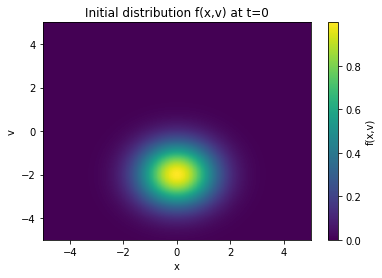

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Position and velocity grid
x = np.linspace(-5, 5, 200)
v = np.linspace(-5, 5, 200)
X, V = np.meshgrid(x, v)

# Initial condition
n0 = 1.0
sigma_x = 1.0
v0 = 2.0
sigma_v = 1.0

n_x = n0 * np.exp(-X**2 / (2 * sigma_x**2))
f_p = np.exp(-(V - v0)**2 / (2 * sigma_v**2))
f0 = n_x * f_p

plt.imshow(f0, extent=[x.min(), x.max(), v.min(), v.max()], aspect='auto')
plt.title("Initial distribution f(x,v) at t=0")
plt.xlabel("x")
plt.ylabel("v")
plt.colorbar(label='f(x,v)')
plt.show()

In [ ]:
# Simulate a set of particles moving in 1D inside a harmonic potential:
# U(x)=1/2*kx^2
# Start with random initial positions and velocities not at equilibrium, 
# and show that the system evolves toward the Maxwell-Boltzmann distribution.


# Equations of motion
# dx/dt = v
# dv/dt = -k/m*x

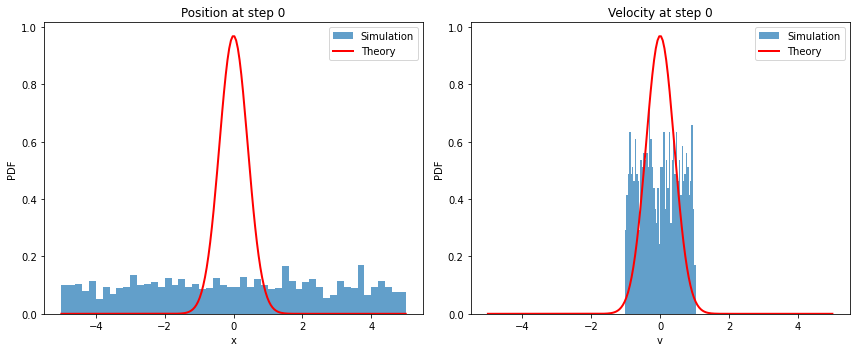

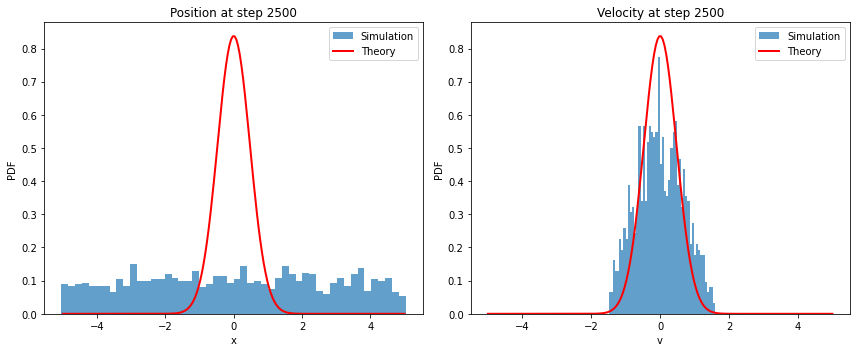

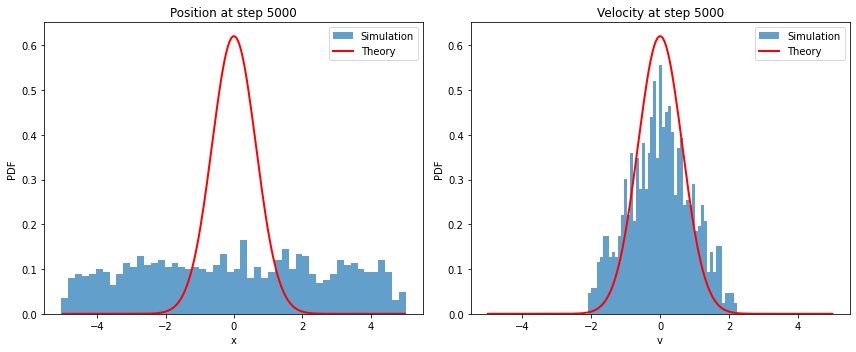

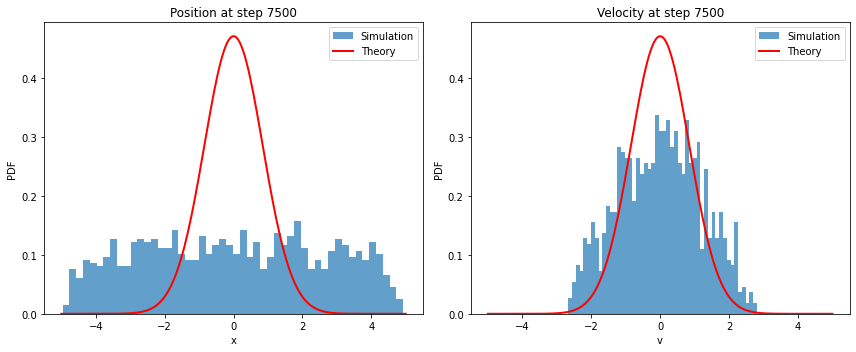

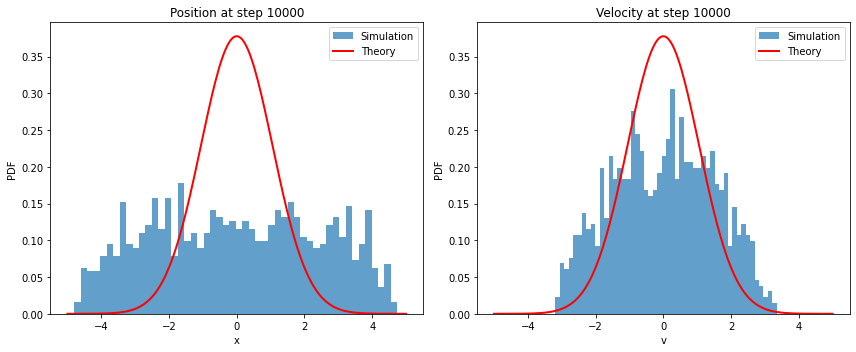

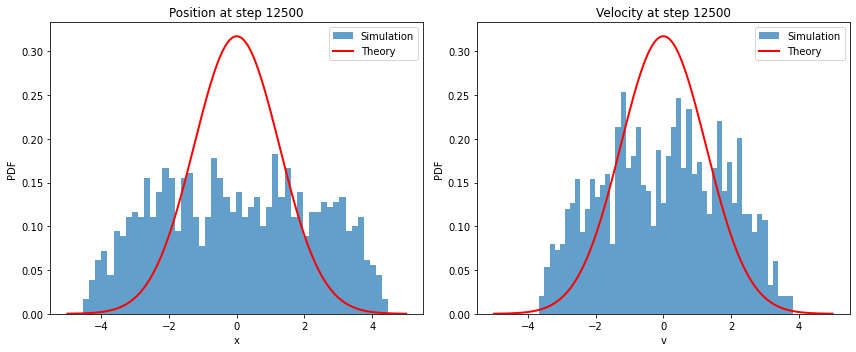

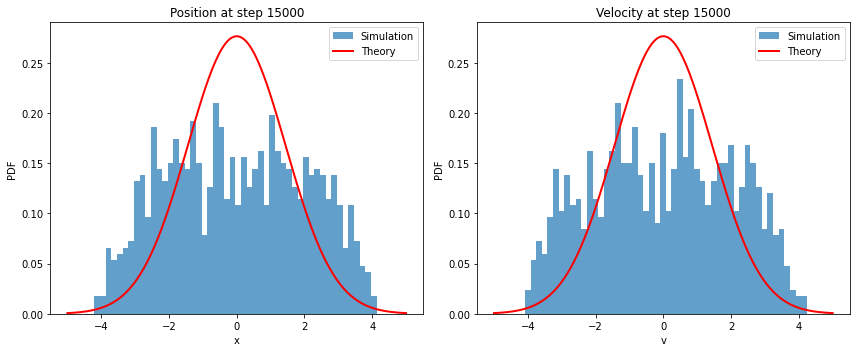

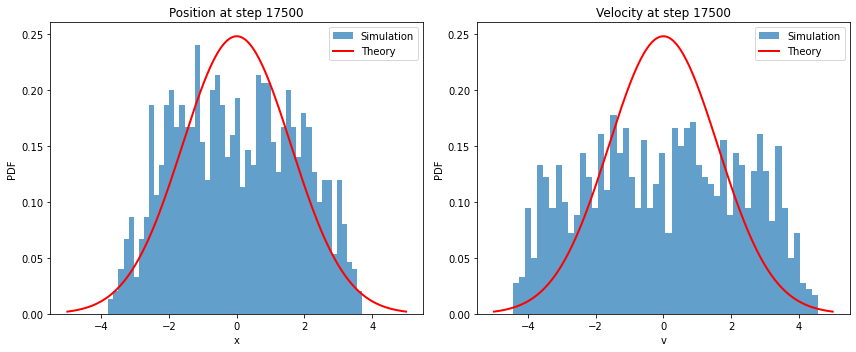

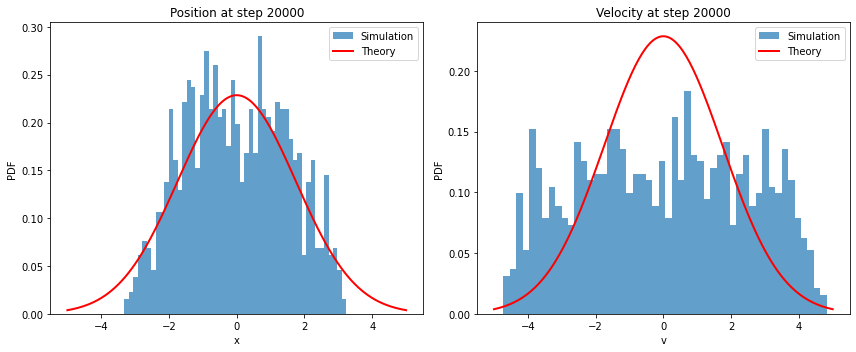

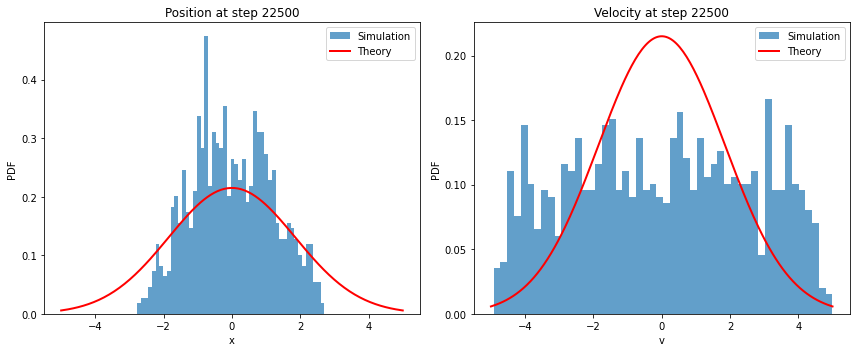

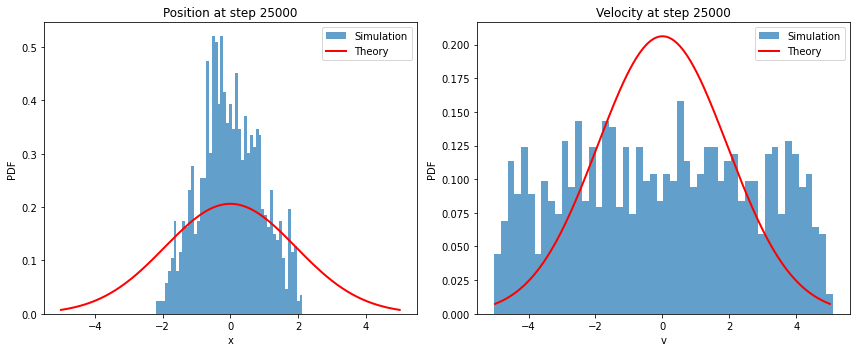

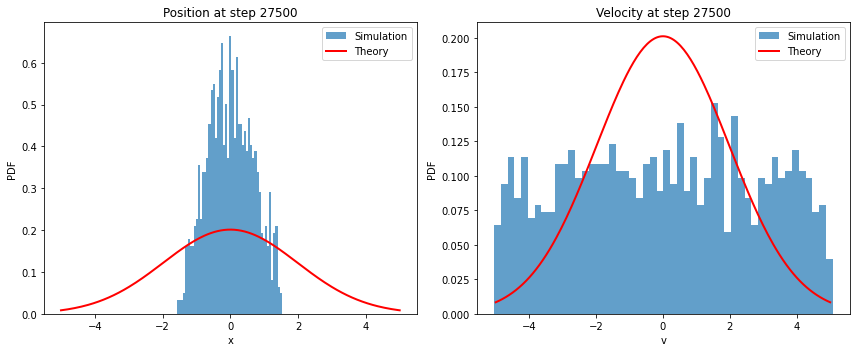

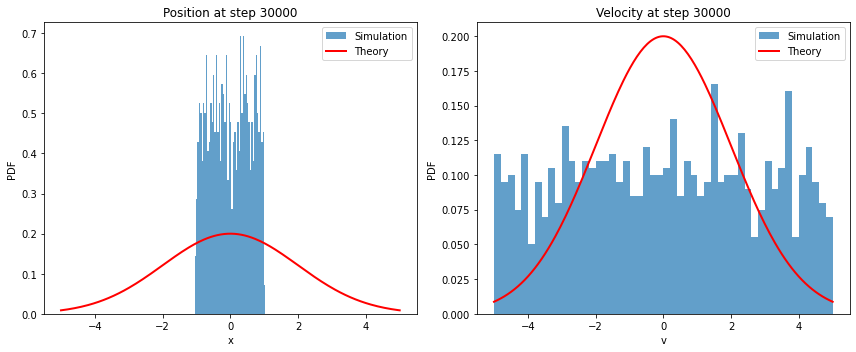

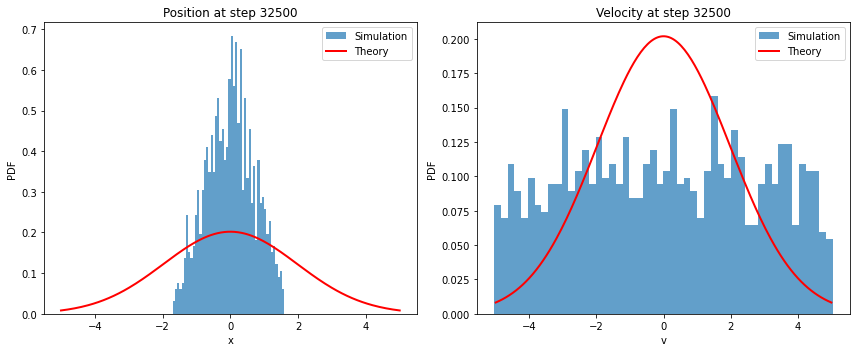

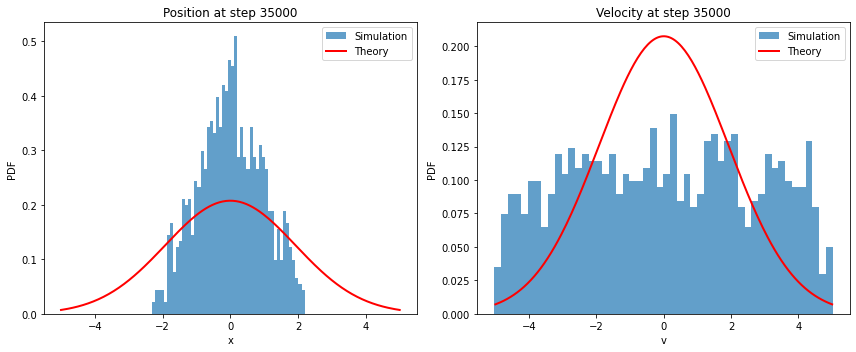

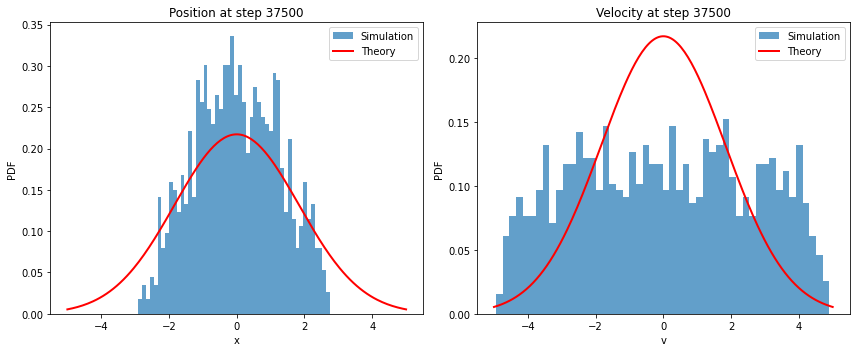

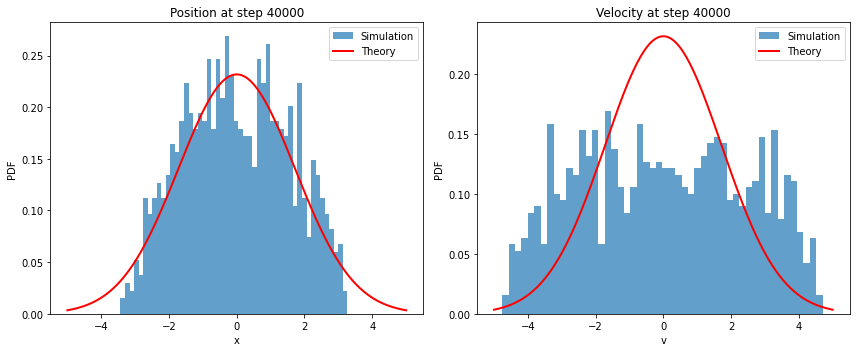

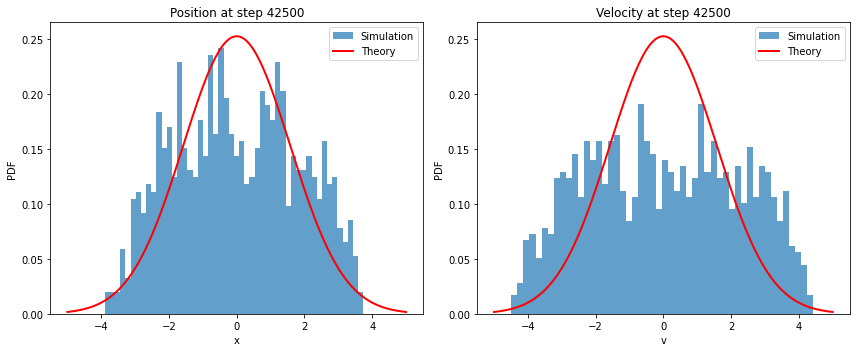

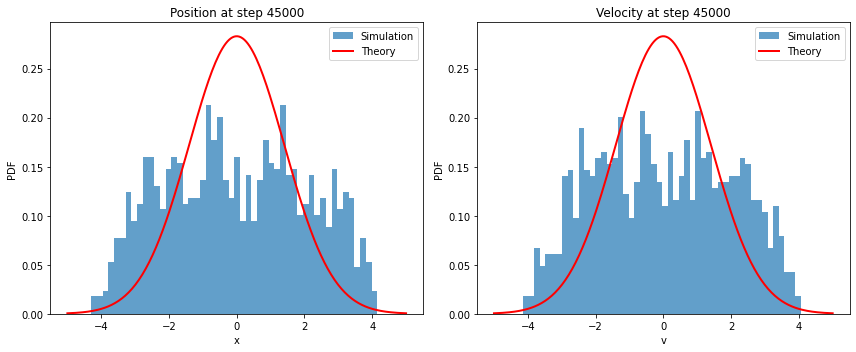

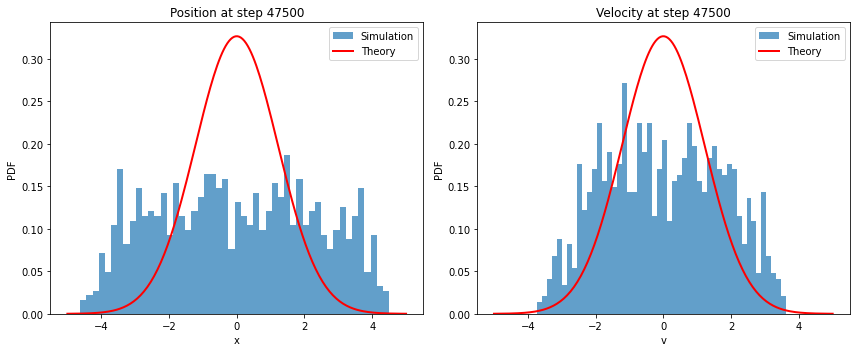

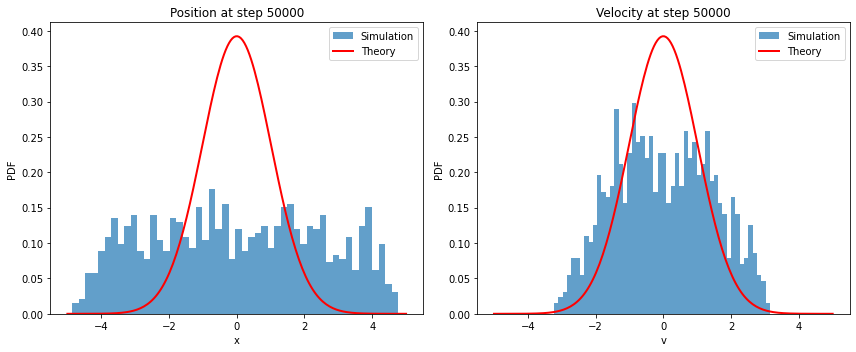

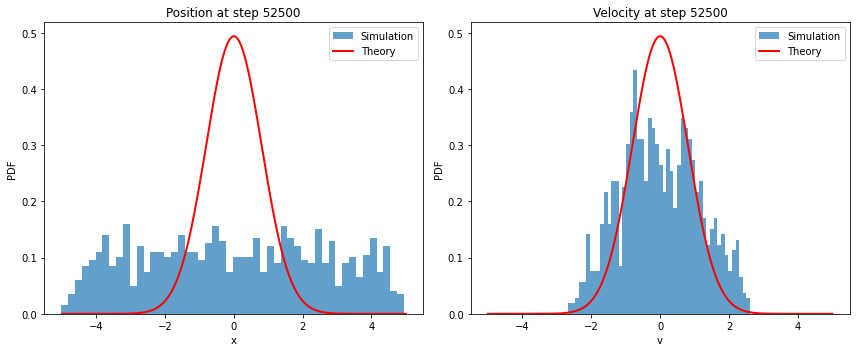

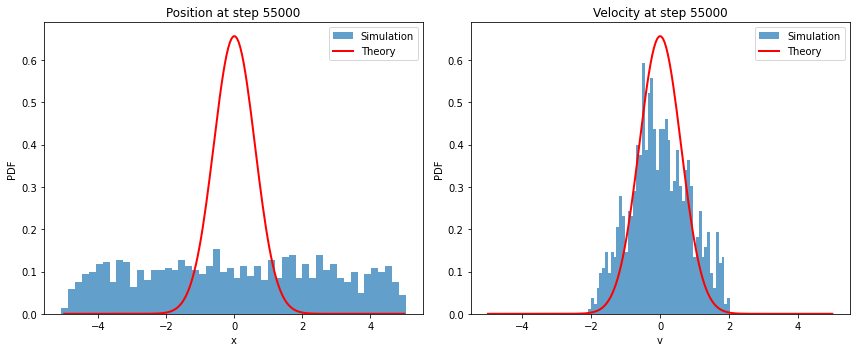

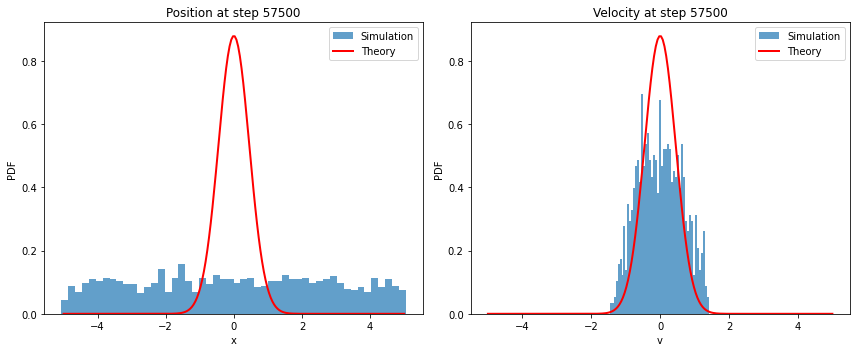

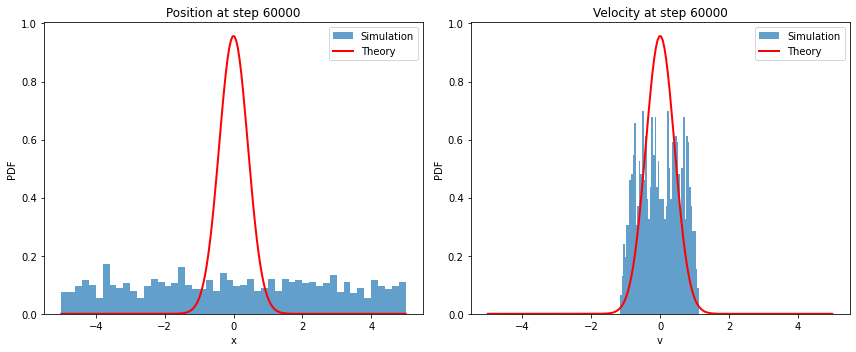

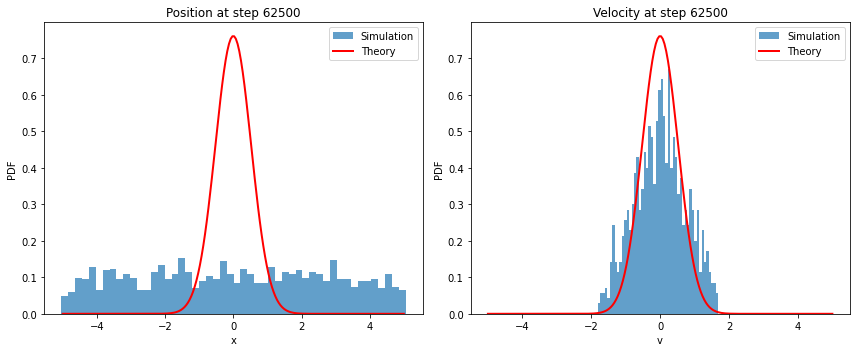

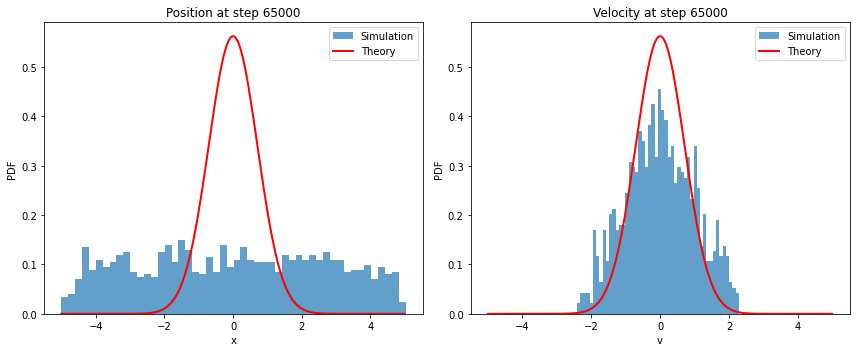

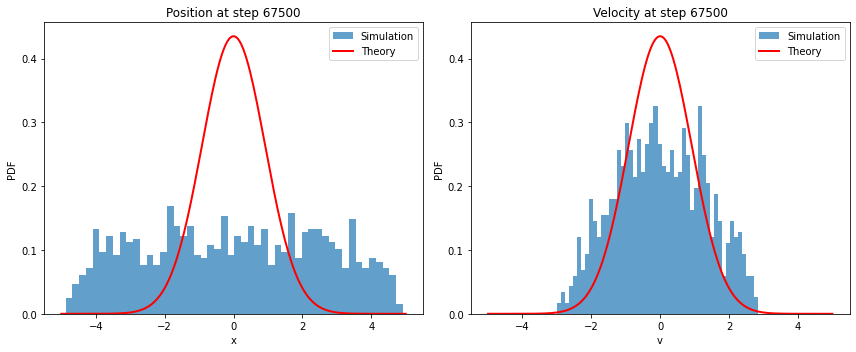

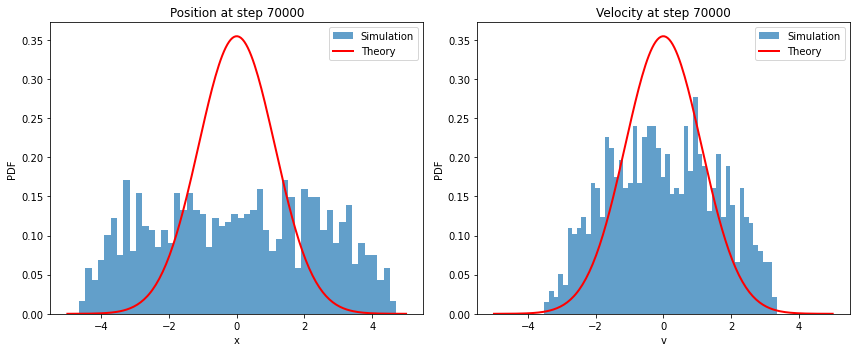

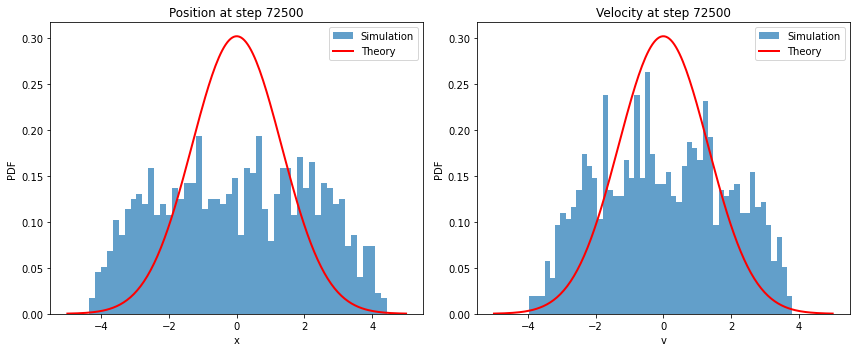

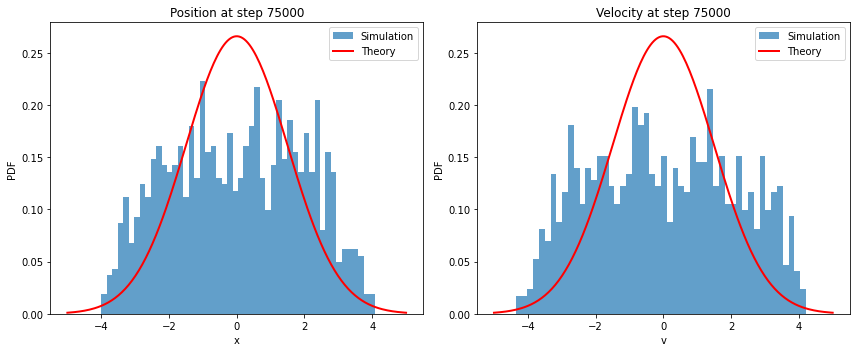

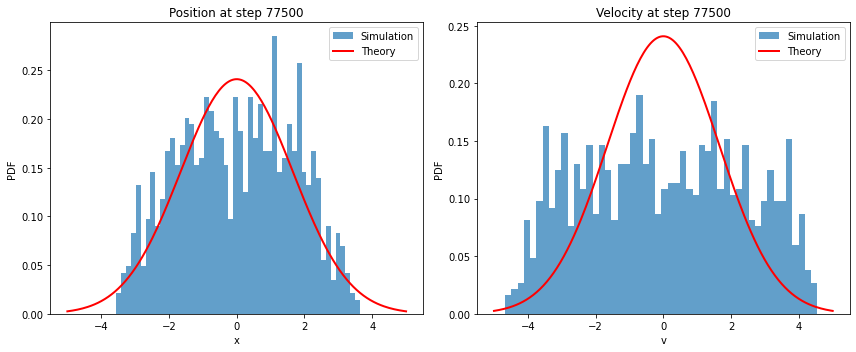

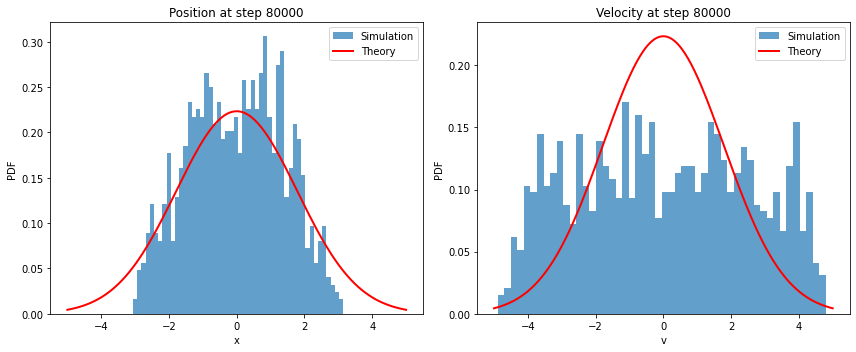

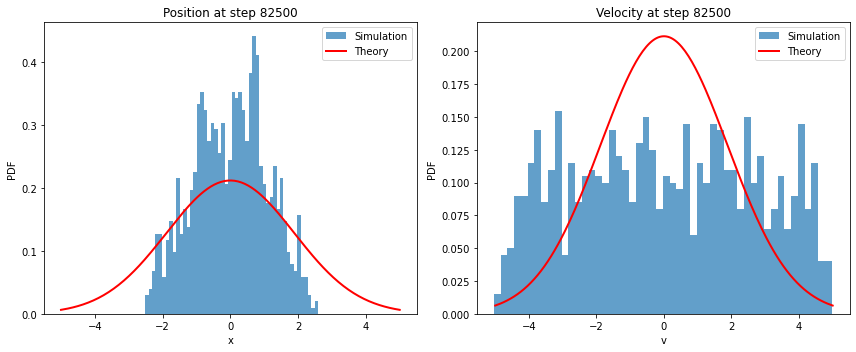

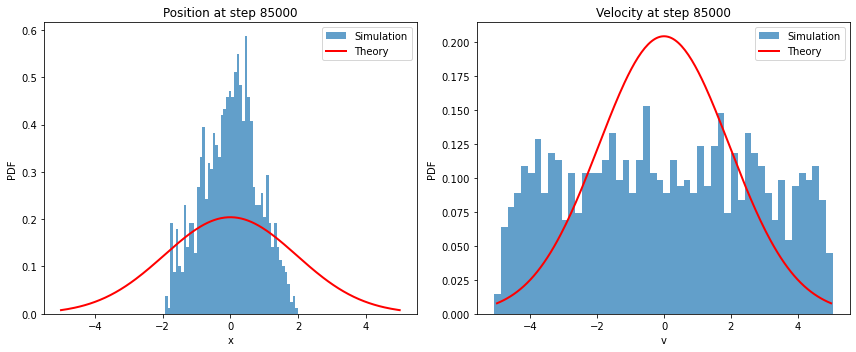

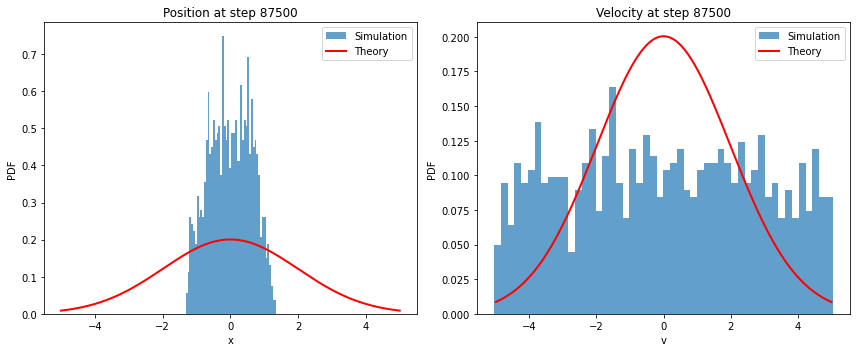

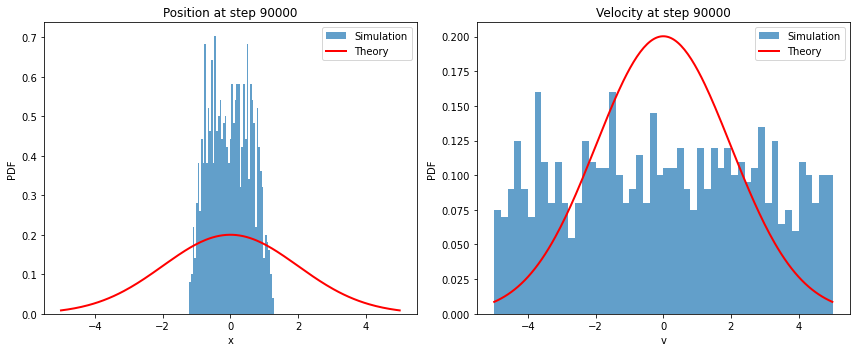

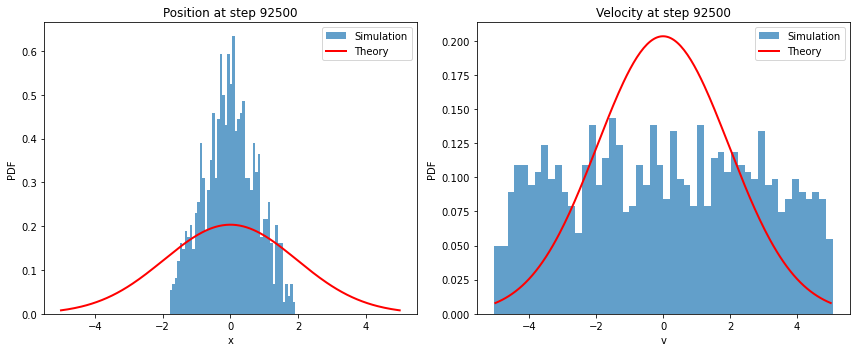

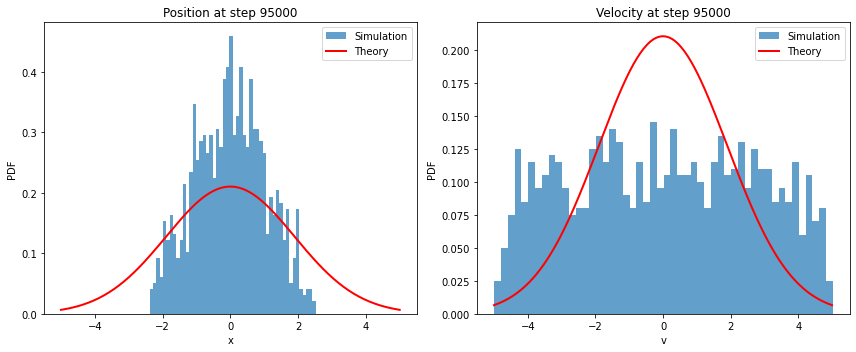

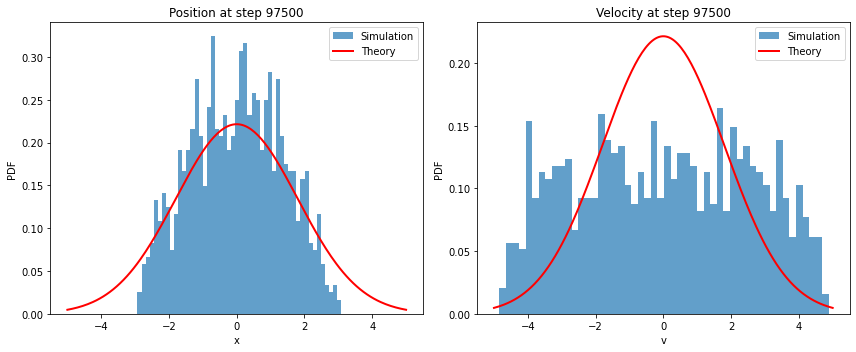

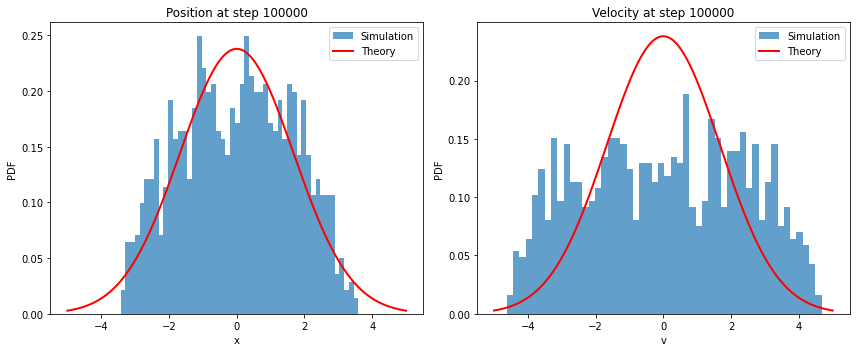

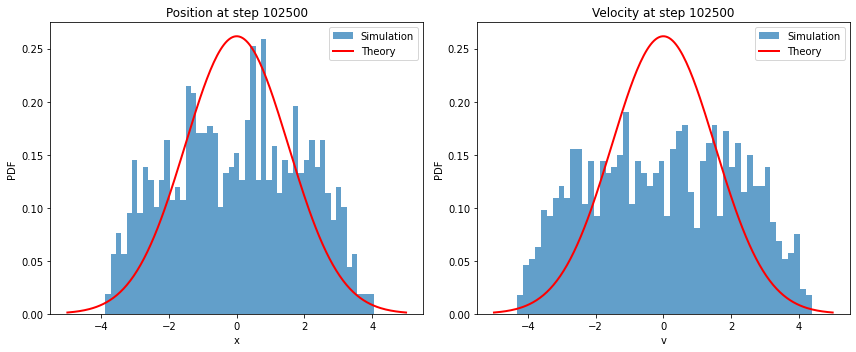

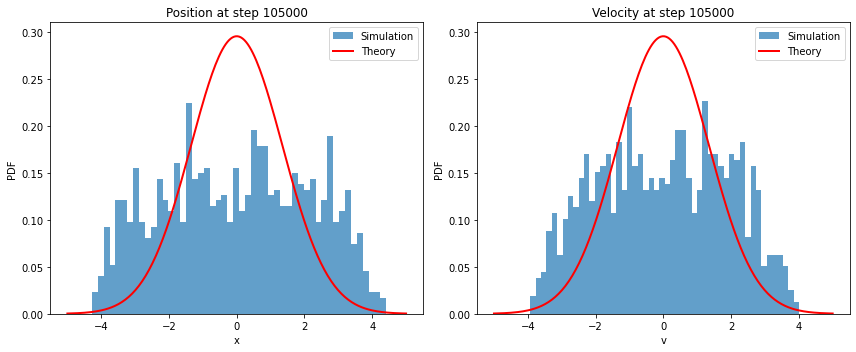

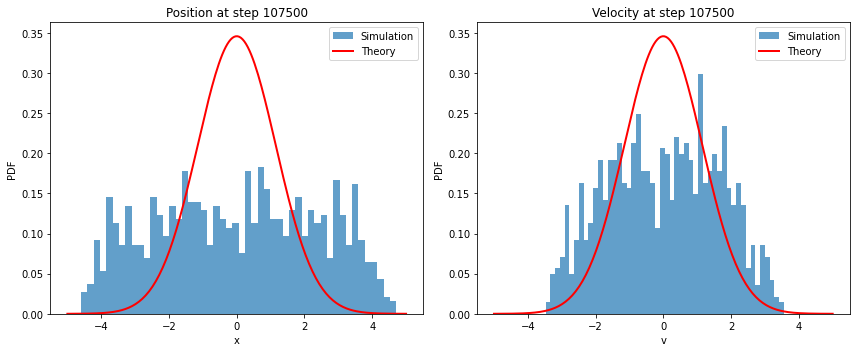

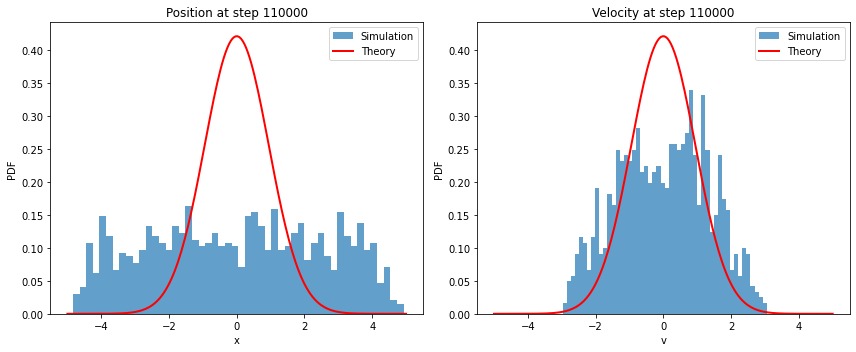

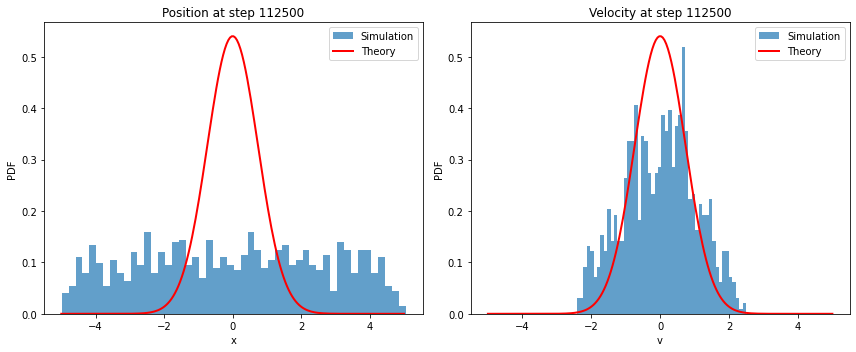

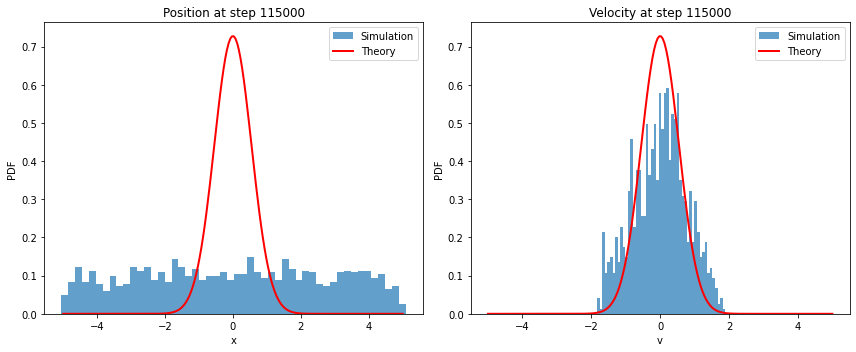

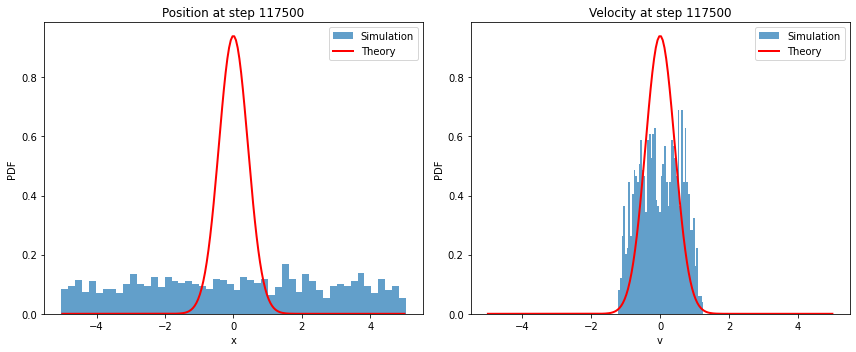

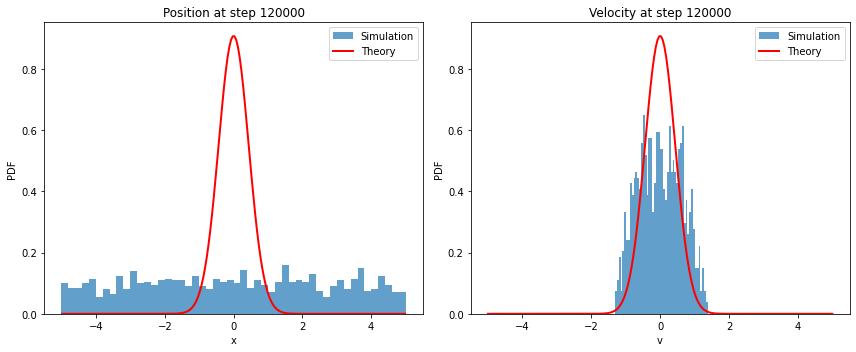

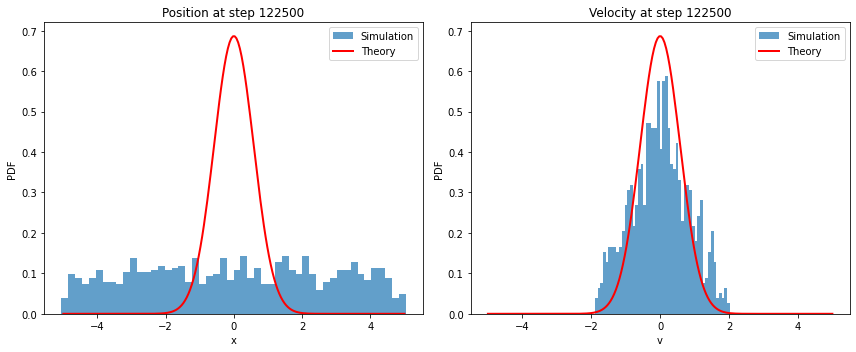

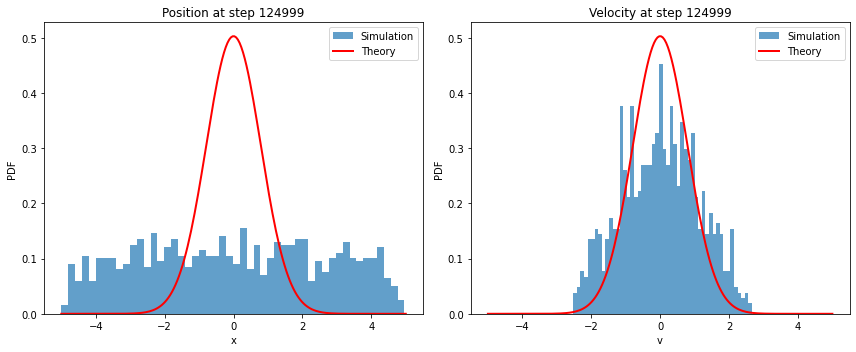

In [ ]:
# Runge Kutta 4th order
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N_particles = 1000   # Number of particles
m = 1.0
k = 1.0

dt = 0.01
Num_steps = 125000  # 125 time units = 12500

# Initial conditions: random positions and velocities
x = np.random.uniform(-5, 5, N_particles)
v = np.random.uniform(-1, 1, N_particles)


# Array to save all positions and velocities
x_position = np.zeros((Num_steps+1, N_particles))
velocity = np.zeros((Num_steps+1, N_particles))
x_position[0,:] = x
velocity[0,:] = v

# RK4 integrator for harmonic oscillator
def rk4_step(x, v, dt, k, m):
    k1x = v
    k1v = -(k/m)*x

    k2x = v + 1/2 * dt * k1v
    k2v = -(k/m) * (x + 1/2 * dt * k1x)

    k3x = v + 1/2 * dt * k2v
    k3v = -(k/m) * (x + 1/2 * dt * k2x)

    k4x = v + dt * k3v
    k4v = -(k/m) * (x + dt * k3x)

    x_new = x + (dt/6)*(k1x + 2*k2x + 2*k3x + k4x)
    v_new = v + (dt/6)*(k1v + 2*k2v + 2*k3v + k4v)

    return x_new, v_new

# Time evolution
for step in range(Num_steps):
    x, v = rk4_step(x, v, dt, k, m)
    
    # Save all positions and velocities
    x_position[step+1,:] = x
    velocity[step+1,:] = v

    # Plot every 2500 steps (~5 oscillations)
    if step % 2500 == 0 or step == Num_steps - 1:
        plt.figure(figsize=(12,5))

        # Position histogram
        plt.subplot(1,2,1)
        plt.hist(x, bins=50, density=True, alpha=0.7, label='Simulation')

        # Theoretical position distribution
        KE = 1/2*m*np.mean(v**2)
        T = KE  # k_B = 1
        sigma_x = np.sqrt(T/k)
        x_vals = np.linspace(-5, 5, 200)
        P_x = 1/(np.sqrt(2*np.pi)*sigma_x)*np.exp(-x_vals**2/(2*sigma_x**2))
        plt.plot(x_vals, P_x, 'r-', lw=2, label='Theory')
        plt.title(f'Position at step {step}')
        plt.xlabel('x')
        plt.ylabel('PDF')
        plt.legend()

        # Velocity histogram
        plt.subplot(1,2,2)
        plt.hist(v, bins=50, density=True, alpha=0.7, label='Simulation')

        sigma_v = np.sqrt(T/m)
        v_vals = np.linspace(-5, 5, 200)
        P_v = 1/(np.sqrt(2*np.pi)*sigma_v)*np.exp(-v_vals**2/(2*sigma_v**2))
        plt.plot(v_vals, P_v, 'r-', lw=2, label='Theory')
        plt.title(f'Velocity at step {step}')
        plt.xlabel('v')
        plt.ylabel('PDF')
        plt.legend()

        plt.tight_layout()
        plt.show()

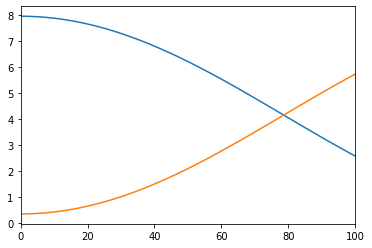

In [ ]:
InterpolationSize = 1
VarX = np.zeros(Num_steps//InterpolationSize)
VarV = np.zeros(Num_steps//InterpolationSize)
for i in range(Num_steps//InterpolationSize):
    VarX[i] += np.var(x_position[i*InterpolationSize,:])
    VarV[i] += np.var(velocity[i*InterpolationSize,:])

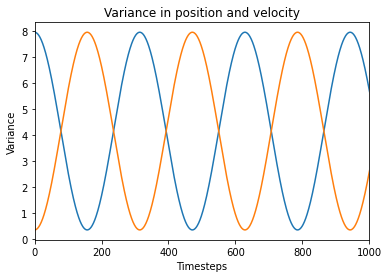

In [ ]:
plt.plot(VarX)
plt.plot(VarV)
plt.xlim(0,1000)
plt.title('Variance in position and velocity')
plt.xlabel('Timesteps')
plt.ylabel('Variance')
plt.show()

In [ ]:
# We see that the velocity distribution quickly resembles a Gaussian, but the positions do not.
# Then the positions become Gaussian while the velicities become random again. These two cycle back and forth.
# This is phase mixing, where the position and velocity oscillate with the same frequency but their phases are shifted.

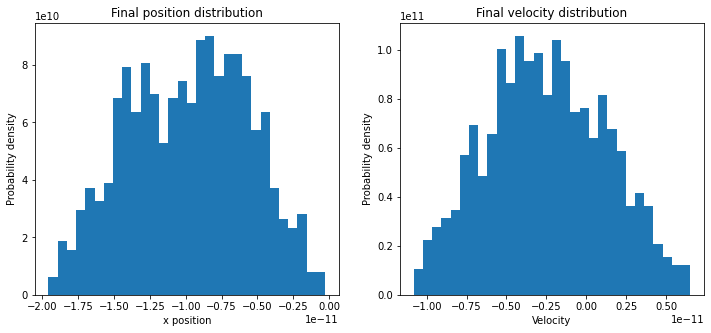

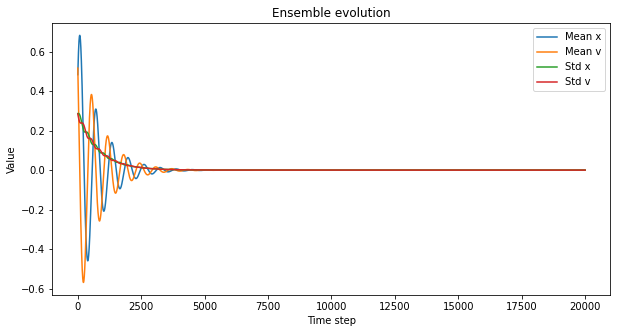

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Parameters
m = 1.0
omega = 1.0
gamma = 0.25
dt = 0.01
steps = 20000
N = 1000  # number of particles

# Force function for all particles
def f(t, y):
    x, v = y
    dxdt = v
    dvdt = -omega**2 * x - (gamma/m) * v
    return np.array([dxdt, dvdt])

# Initial conditions (Gaussian distribution for example)
x0 = np.random.uniform(0, 1.0, N)
v0 = np.random.uniform(0, 1.0, N)
y = np.array([x0, v0])  # shape (2, N)

# Storage for means over time
mean_x = [np.mean(x0)]
mean_v = [np.mean(v0)]
std_x = [np.std(x0)]
std_v = [np.std(v0)]
VarX = np.zeros(steps)
VarV = np.zeros(steps)

# Time evolution with RK4 (vectorized)
for i in range(steps):
    t = i * dt
    k1 = f(t, y)
    k2 = f(t + dt/2, y + dt/2 * k1)
    k3 = f(t + dt/2, y + dt/2 * k2)
    k4 = f(t + dt, y + dt * k3)
    y = y + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)
    
    mean_x.append(np.mean(y[0]))
    mean_v.append(np.mean(y[1]))
    std_x.append(np.std(y[0]))
    std_v.append(np.std(y[1]))
    VarX[i] = np.var(y[0])
    VarV[i] = np.var(y[1])

# Final histograms
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(y[0], bins=30, density=True)
plt.xlabel('x position')
plt.ylabel('Probability density')
plt.title('Final position distribution')

plt.subplot(1,2,2)
plt.hist(y[1], bins=30, density=True)
plt.xlabel('Velocity')
plt.ylabel('Probability density')
plt.title('Final velocity distribution')

plt.show()

# Time evolution of mean and spread
plt.figure(figsize=(10,5))
plt.plot(mean_x, label='Mean x')
plt.plot(mean_v, label='Mean v')
plt.plot(std_x, label='Std x')
plt.plot(std_v, label='Std v')
plt.xlabel('Time step')
plt.ylabel('Value')
plt.legend()
plt.title('Ensemble evolution')
plt.show()


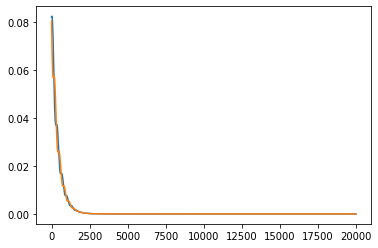

In [ ]:
plt.plot(VarX)
plt.plot(VarV)

## Part 2: The Langevin equation

In [ ]:
# Simulating thermalisation requires friction, random noise, or collisions.
# We will make it more realistic by solving the Langevin equation

# We will add a drag term, gamma, and a noise term, eta, to implement stochastic kicks.

# The Langevin equation is a stochastic differential equation (SDE), for which the Euler–Maruyama can be used.
# The RK4 method is used for smooth, deterministic right-hand sides, not for white noise.

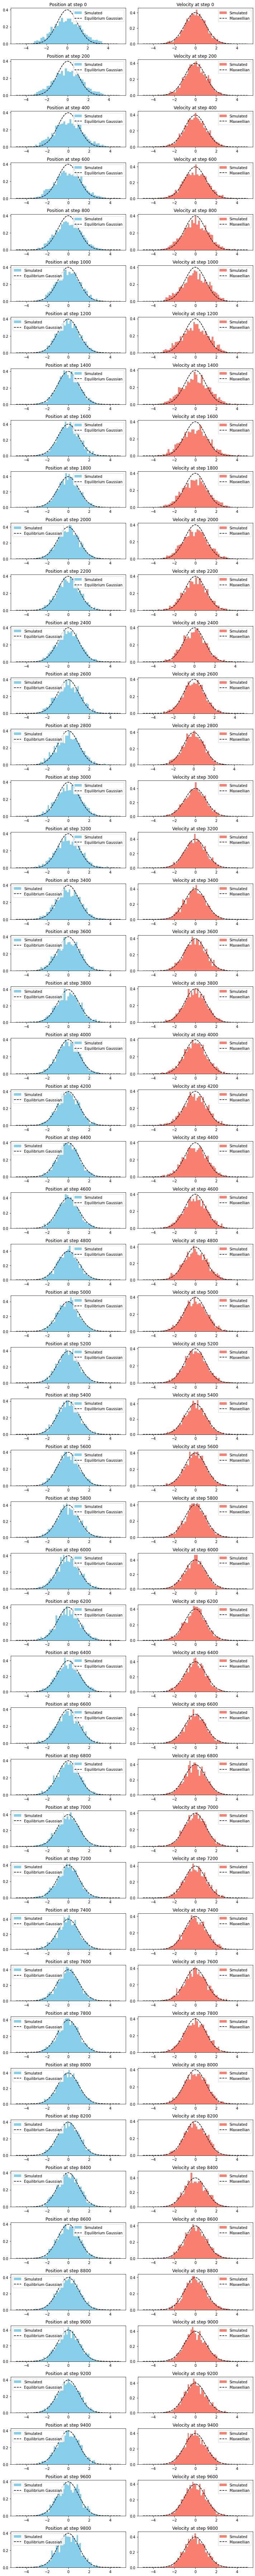

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

N = 2000
T = 1.0
m = 1.0
gamma = 0.25
k = 1.0

D = gamma * T / m

dt = 0.001
Num_steps = 10000
save_every = 200

# Initial conditions: random positions and velocities
x = np.random.normal(0, np.sqrt(2), N)
v = np.random.normal(0, 1, N)

x_histories = []
v_histories = []

for step in range(Num_steps):
    x += v * dt
    v += (-gamma/m * v - k/m * x) * dt + np.sqrt(2 * D / m * dt) * np.random.randn(N)
    
    if step % save_every == 0:
        x_histories.append(x.copy())
        v_histories.append(v.copy())

sigma_x = np.sqrt(T / k)
sigma_v = np.sqrt(T / m)

fig, axes = plt.subplots(len(x_histories), 2, figsize=(10, 2*len(x_histories)))

for i, (x_vals, v_vals) in enumerate(zip(x_histories, v_histories)):
    # Position
    axes[i, 0].hist(x_vals, bins=50, density=True, color='skyblue', label='Simulated')
    x_range = np.linspace(-5*sigma_x, 5*sigma_x, 200)
    pos_pdf = norm.pdf(x_range, 0, sigma_x)
    axes[i, 0].plot(x_range, pos_pdf, 'k--', label='Equilibrium Gaussian')
    axes[i, 0].set_title(f'Position at step {i*save_every}')
    axes[i, 0].legend()
    
    # Velocity
    axes[i, 1].hist(v_vals, bins=50, density=True, color='salmon', label='Simulated')
    v_range = np.linspace(-5*sigma_v, 5*sigma_v, 200)
    v_pdf = norm.pdf(v_range, 0, sigma_v)
    axes[i, 1].plot(v_range, v_pdf, 'k--', label='Maxwellian')
    axes[i, 1].set_title(f'Velocity at step {i*save_every}')
    axes[i, 1].legend()

plt.tight_layout()
plt.show()


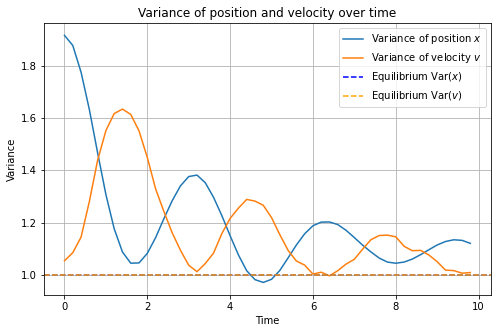

In [ ]:
times = np.arange(len(x_histories)) * save_every * dt

# Compute variances over particles at each saved snapshot
var_x = [np.var(x_snapshot) for x_snapshot in x_histories]
var_v = [np.var(v_snapshot) for v_snapshot in v_histories]
VarX2 = [np.var(x_snapshot)**2 for x_snapshot in x_histories]
VarV2 = [np.var(v_snapshot)**2 for v_snapshot in v_histories]

plt.figure(figsize=(8,5))
plt.plot(times, var_x, label='Variance of position $x$')
plt.plot(times, var_v, label='Variance of velocity $v$')

# Add expected equilibrium values as horizontal lines
sigma_x_eq = np.sqrt(T / k)
sigma_v_eq = np.sqrt(T / m)

plt.axhline(y=sigma_x_eq**2, color='blue', linestyle='--', label='Equilibrium $\\mathrm{Var}(x)$')
plt.axhline(y=sigma_v_eq**2, color='orange', linestyle='--', label='Equilibrium $\\mathrm{Var}(v)$')

plt.xlabel('Time')
plt.ylabel('Variance')
plt.legend()
plt.title('Variance of position and velocity over time')
plt.grid(True)
plt.show()

In [ ]:
# The drag and noise term balance each other, so the positions and velocities will settle towards a Maxwellian distribution.
# The variance in position and velocity will oscillate around that of a Maxwellian distribution because of the noise term.

## Part 3: The 1D BGK Boltzmann model

In [ ]:
# BGK model to evolve distribution function
# df/dt + v*df/dx + F*df/dv = ν*(f - f_eq) 
# LHS: Free streaming + external force
# RHS: Relaxation to local equilibrium at rate ν.

In [ ]:
# Discretise phase space
# Grid in (x,v)
Nx = 100  # spatial points
Nv = 50   # velocity grid
Lx = 1.0  # box length
Lv = 5.0  # max |v|
T = 1     # temperature

dx = Lx/Nx
dv = 2*Lv/Nv

x = np.linspace(0, Lx, Nx, endpoint=False)
v = np.linspace(-Lv, Lv, Nv)


# Time parameters
dt = 0.01
nu = 1.0  # collision frequency
num_steps = 500

# Initial distribution: a bump in the middle
X, V = np.meshgrid(x, v, indexing='ij')
print(X,V)
f = (1 + 0.5 * np.cos(2 * np.pi * X / Lx)) * (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * V**2)
print(f)

[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 ...
 [0.97 0.97 0.97 ... 0.97 0.97 0.97]
 [0.98 0.98 0.98 ... 0.98 0.98 0.98]
 [0.99 0.99 0.99 ... 0.99 0.99 0.99]] [[-5.         -4.79591837 -4.59183673 ...  4.59183673  4.79591837
   5.        ]
 [-5.         -4.79591837 -4.59183673 ...  4.59183673  4.79591837
   5.        ]
 [-5.         -4.79591837 -4.59183673 ...  4.59183673  4.79591837
   5.        ]
 ...
 [-5.         -4.79591837 -4.59183673 ...  4.59183673  4.79591837
   5.        ]
 [-5.         -4.79591837 -4.59183673 ...  4.59183673  4.79591837
   5.        ]
 [-5.         -4.79591837 -4.59183673 ...  4.59183673  4.79591837
   5.        ]]
[[2.23007927e-06 6.05945971e-06 1.57928110e-05 ... 1.57928110e-05
  6.05945971e-06 2.23007927e-06]
 [2.22861242e-06 6.05547406e-06 1.57824231e-05 ... 1.57824231e-05
  6.05547406e-06 2.22861242e-06]
 [2.22421766e-06 6.04353283e-06 1.57513006e-05 ... 1.57513006e-05
  6.04353283e-06

In [ ]:
def compute_f_eq(f):
    # Integrate over v to get density rho(x) and mean velocity u(x)
    rho = np.sum(f, axis=1) * dv
    u = np.sum(f*V, axis=1) * dv / rho
    print(rho.shape())
    print(np.zeros_like(f).shape())

    f_eq = np.zeros_like(f)
    for i in range(Nx):
        f_eq[i, :] = rho[i] / np.sqrt(2*np.pi*T) * np.exp(-T/2*(V - u[i])**2)
    return f_eq

for step in range(steps):
    # Free-streaming step (semi-Lagrangian)
    for j in range(Nv):
        shift = -v[j] * dt / dx
        f[:, j] = np.roll(f[:, j], int(shift))
    
    # Collision (BGK relaxation)
    f_eq = compute_f_eq(f)
    f += -nu * (f - f_eq) * dt

    if step % 50 == 0:
        plt.clf()
        plt.imshow(f.T, origin='lower', aspect='auto', extent=[0, Lx, -Lv, Lv])
        plt.colorbar(label='f(x,v)')
        plt.title(f"BGK at step {step}")
        plt.xlabel('x')
        plt.ylabel('v')
        plt.pause(0.1)

plt.show()

TypeError: 'tuple' object is not callable

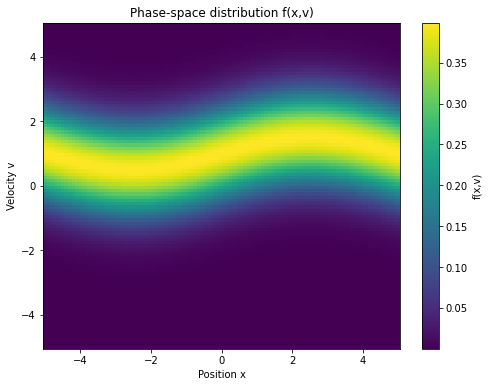

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Grids
Nx = 100  # number of spatial points
Nv = 100  # number of velocity points
x = np.linspace(-5, 5, Nx)
v = np.linspace(-5, 5, Nv)

X, V = np.meshgrid(x, v, indexing='ij')  # make phase space grid

# 2. Make a sample distribution function
# Example: Maxwellian with a bump moving to the right
rho = 1.0                      # density
u = 1.0 + 0.5 * np.sin(2 * np.pi * X / 10)  # local mean velocity (position dependent)
T = 1.0                        # constant temperature

f = rho / np.sqrt(2 * np.pi * T) * np.exp(-0.5 * ((V - u) ** 2) / T)

# 3. Plot
plt.figure(figsize=(8, 6))
plt.pcolormesh(x, v, f.T, shading='auto', cmap='viridis')
plt.colorbar(label='f(x,v)')
plt.xlabel('Position x')
plt.ylabel('Velocity v')
plt.title('Phase-space distribution f(x,v)')
plt.show()


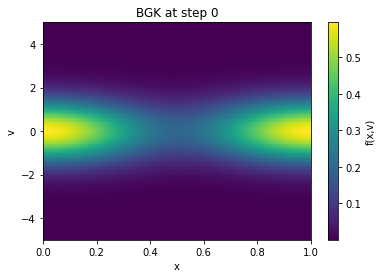

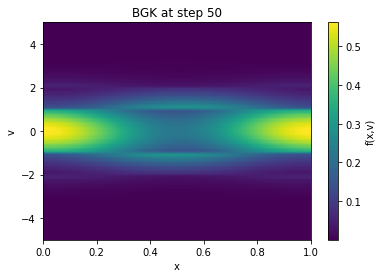

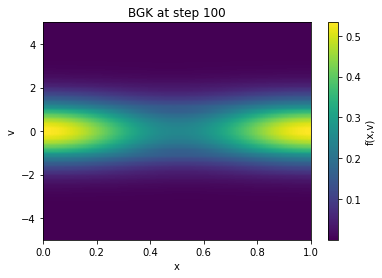

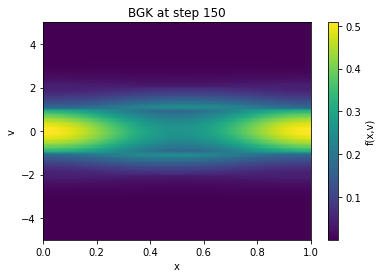

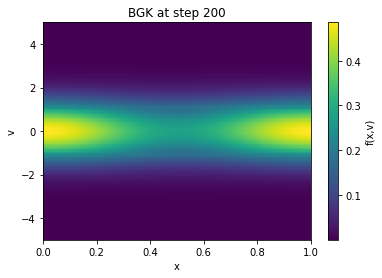

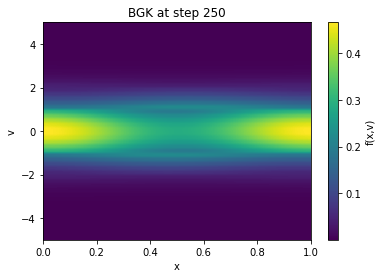

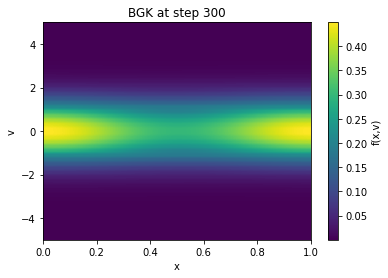

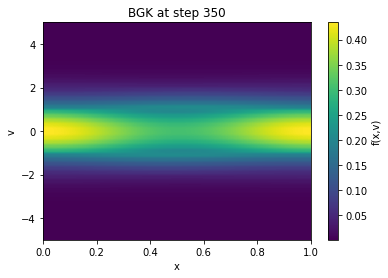

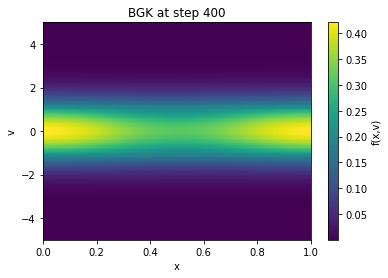

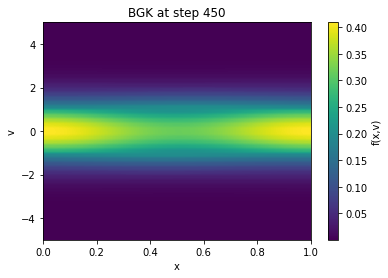

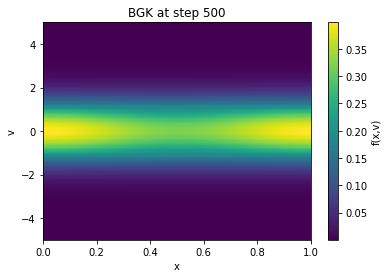

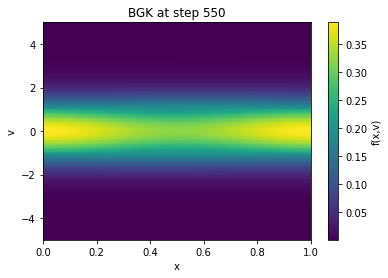

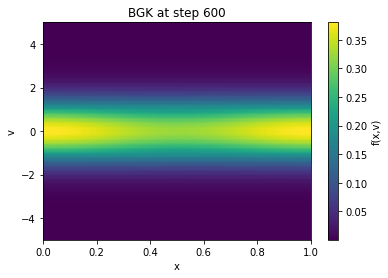

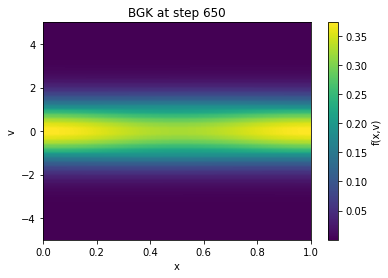

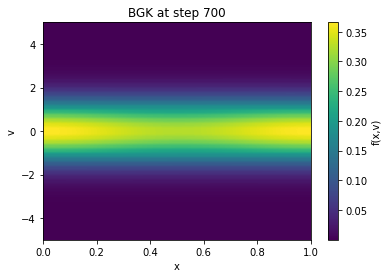

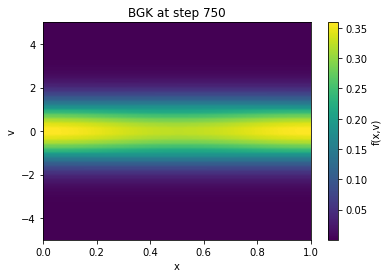

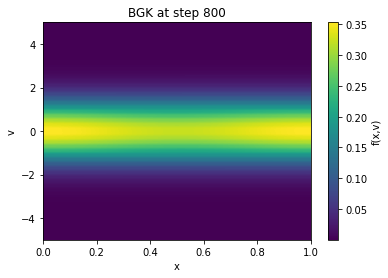

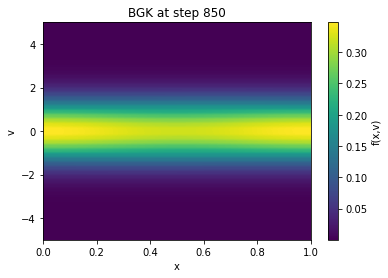

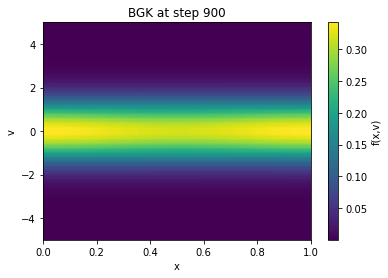

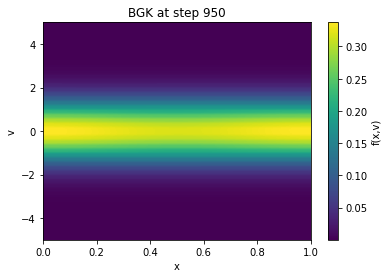

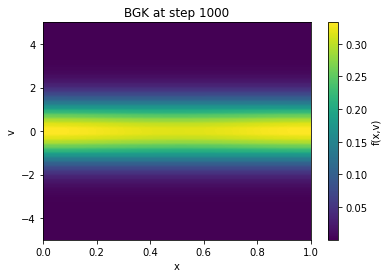

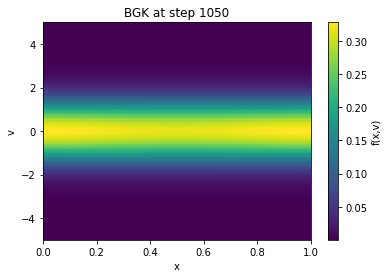

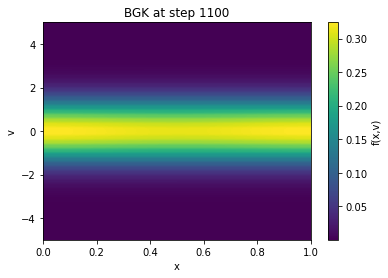

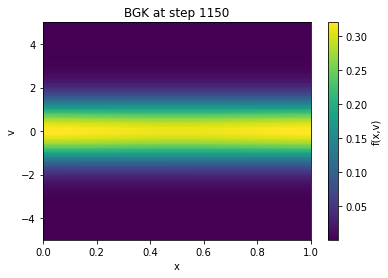

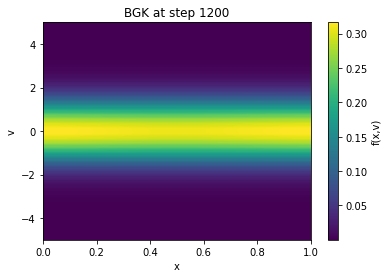

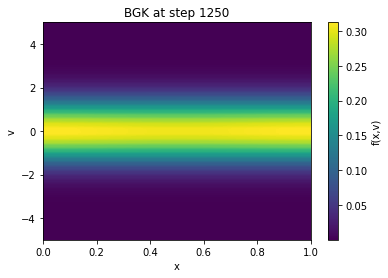

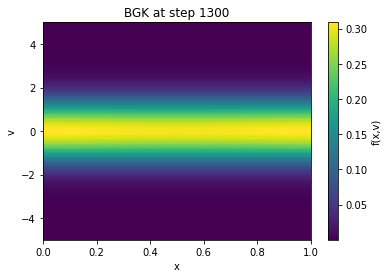

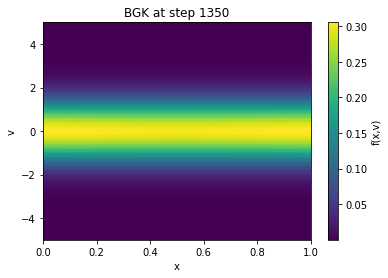

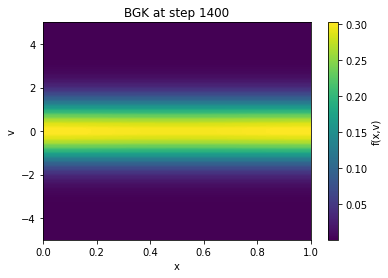

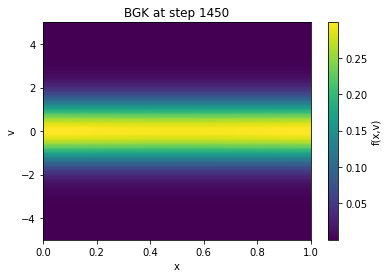

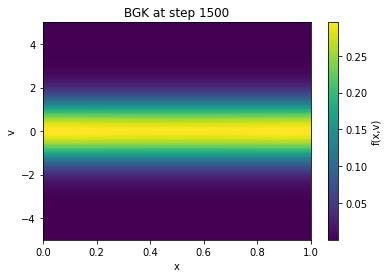

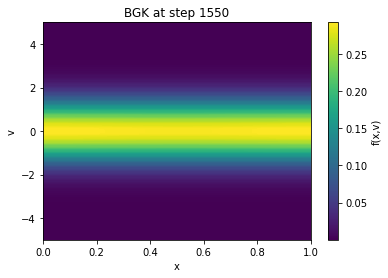

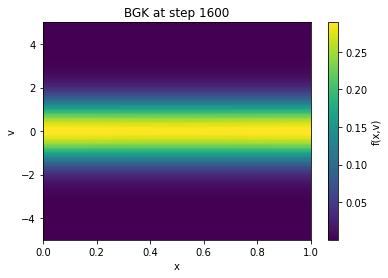

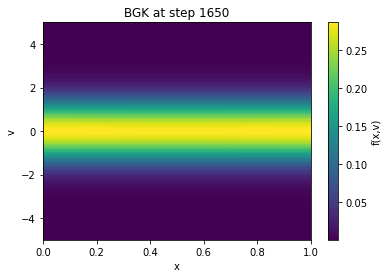

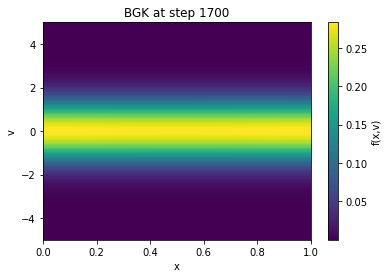

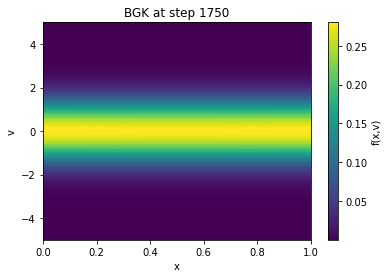

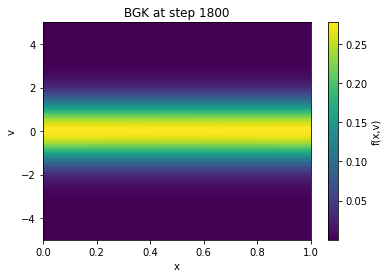

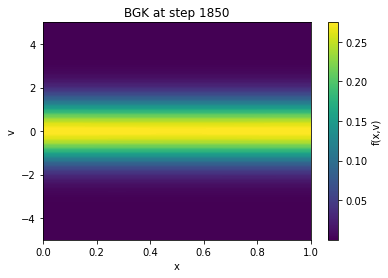

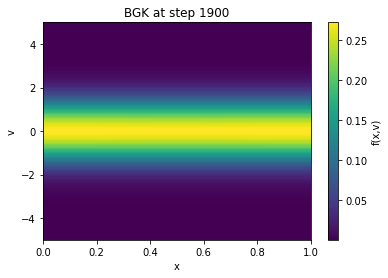

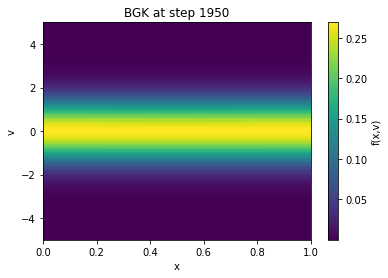

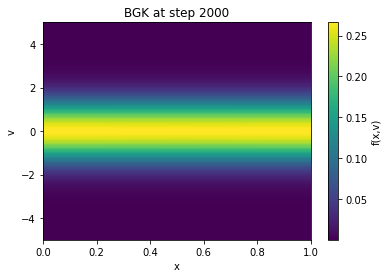

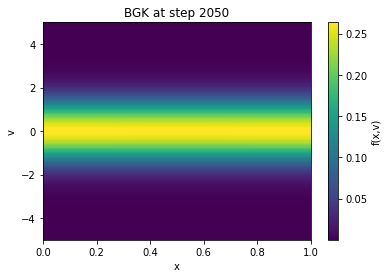

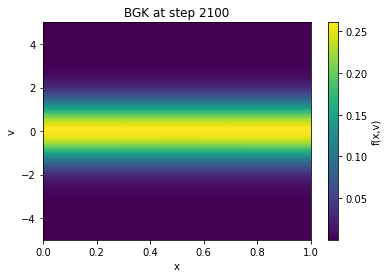

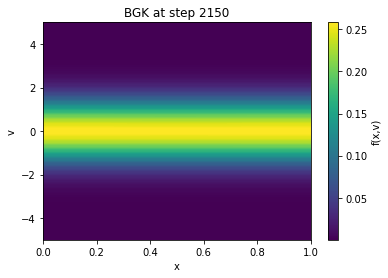

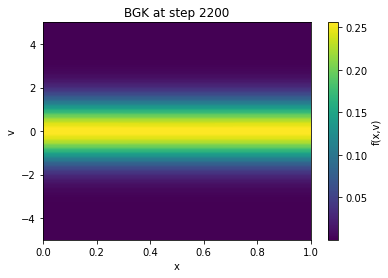

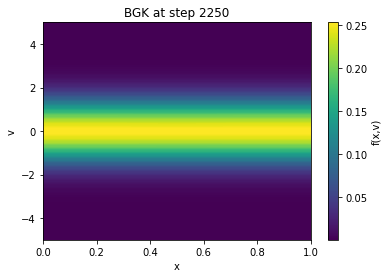

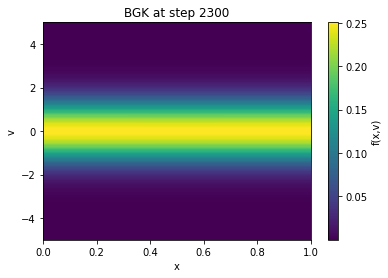

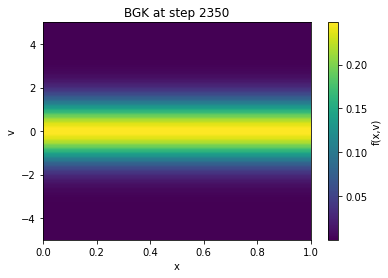

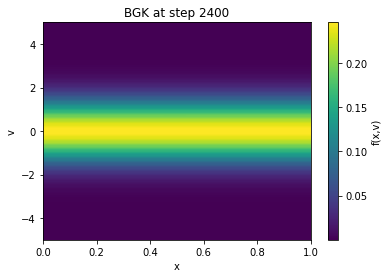

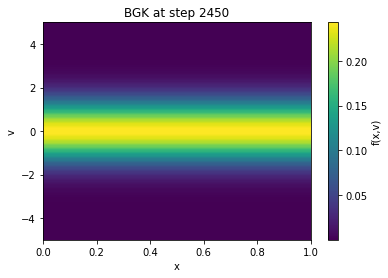

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# 1D BGK setup
# ---------------------------

Nx = 100  # spatial points
Nv = 50   # velocity grid
Lx = 1.0  # box length
Lv = 5.0  # max |v|

dx = Lx / Nx
dv = 2 * Lv / Nv

x = np.linspace(-0.5*Lx, 0.5*Lx, Nx, endpoint=False)
v = np.linspace(-Lv, Lv, Nv)

# time params
dt = 0.01
nu = 1.0  # collision frequency
steps = 1000

# ---------------------------
# Initial distribution f(x, v)
# ---------------------------

# For example: a bump in the middle
X, V = np.meshgrid(x, v, indexing='ij')
f = (1 + 0.5 * np.cos(2 * np.pi * X / Lx)) * (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * V**2)

# ---------------------------
# Helper: compute feq
# ---------------------------

def compute_feq(f):
    # integrate over v to get density and mean velocity at each x
    rho = np.sum(f, axis=1) * dv
    u = np.sum(f * V, axis=1) * dv / rho

    feq = np.zeros_like(f)
    for i in range(Nx):
        feq = rho[:, None] / np.sqrt(2*np.pi) * np.exp(-0.5 * (V - u[:, None])**2)
    return feq

# ---------------------------
# Main loop
# ---------------------------

for step in range(steps):
    # Free-streaming step (semi-Lagrangian)
    for j in range(Nv):
        shift = -v[j] * dt / dx
        f[:, j] = np.roll(f[:, j], int(shift))
    
    # Collision (BGK relaxation)
    feq = compute_feq(f)
    f += -nu * (f - feq) * dt

    if step % 50 == 0:
        plt.clf()
        plt.imshow(f.T, origin='lower', aspect='auto', extent=[0, Lx, -Lv, Lv])
        plt.colorbar(label='f(x,v)')
        plt.title(f"BGK at step {step}")
        plt.xlabel('x')
        plt.ylabel('v')
        plt.pause(0.1)

plt.show()
